In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm

In [4]:
# 현재경로 확인
os.getcwd()

'D:\\개인폴더\\온라인강의\\실습자료'

# 단순선형회귀분석(선형회귀실습자료와동일)

In [5]:
# 데이터 불러오기
boston = pd.read_csv("./data/Boston_house.csv")
boston

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
5,58.7,394.12,6.430,0.02985,6.0622,2.18,5.21,0.458,18.7,3,0.0,222,0,28.7
6,66.6,395.60,6.012,0.08829,5.5605,7.87,12.43,0.524,15.2,5,12.5,311,0,22.9
7,96.1,396.90,6.172,0.14455,5.9505,7.87,19.15,0.524,15.2,5,12.5,311,0,27.1
8,100.0,386.63,5.631,0.21124,6.0821,7.87,29.93,0.524,15.2,5,12.5,311,0,16.5
9,85.9,386.71,6.004,0.17004,6.5921,7.87,17.10,0.524,15.2,5,12.5,311,0,18.9


In [13]:
boston_data = boston.drop(['Target'],axis=1)
# boston_data

In [14]:
'''
타겟 데이터
1978 보스턴 주택 가격
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

특징 데이터
CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율'''

'\n타겟 데이터\n1978 보스턴 주택 가격\n506개 타운의 주택 가격 중앙값 (단위 1,000 달러)\n\n특징 데이터\nCRIM: 범죄율\nINDUS: 비소매상업지역 면적 비율\nNOX: 일산화질소 농도\nRM: 주택당 방 수\nLSTAT: 인구 중 하위 계층 비율\nB: 인구 중 흑인 비율\nPTRATIO: 학생/교사 비율\nZN: 25,000 평방피트를 초과 거주지역 비율\nCHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0\nAGE: 1940년 이전에 건축된 주택의 비율\nRAD: 방사형 고속도로까지의 거리\nDIS: 직업센터의 거리\nTAX: 재산세율'

In [15]:
target = boston[['Target']]
# boston_target
crim=boston[['CRIM']]
rm=boston[['RM']]
lstat=boston['LSTAT']

In [16]:
crim1 = sm.add_constant(crim, has_constant='add')

In [17]:
model1 = sm.OLS(target,crim1)
fitted_model1=model1.fit()


In [18]:
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           1.17e-19
Time:                        13:12:38   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
pred1=fitted_model1.predict(crim1)

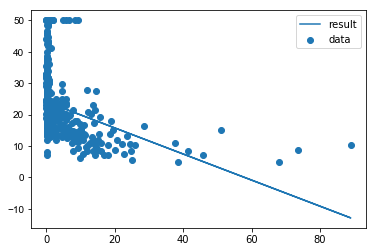

In [20]:
import matplotlib.pyplot as plt
plt.yticks(fontname = "Arial") #
plt.scatter(crim,target,label="data")
plt.plot(crim,pred1,label="result")
plt.legend()
plt.show()

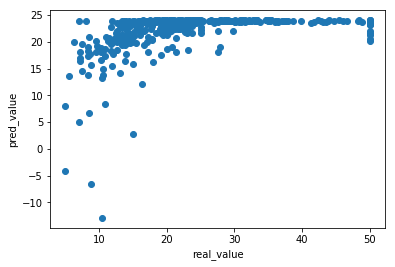

In [21]:

plt.scatter(target,pred1)
plt.xlabel("real_value")
plt.ylabel("pred_value")
plt.show()

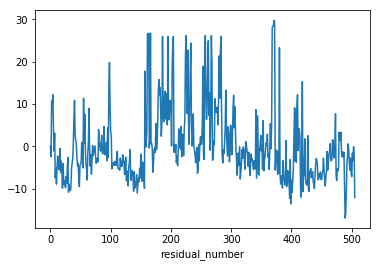

In [22]:
fitted_model1.resid.plot()
plt.xlabel("residual_number")
plt.show()

In [23]:
sum(fitted_model1.resid)

-2.717825964282383e-13

In [24]:
rm1 = sm.add_constant(rm, has_constant='add')
lstat1 = sm.add_constant(lstat, has_constant='add')

In [25]:
model2 = sm.OLS(target,rm1)
fitted_model2=model2.fit()
model3 = sm.OLS(target,lstat1)
fitted_model3=model3.fit()

In [26]:
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           2.49e-74
Time:                        13:12:39   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
fitted_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           5.08e-88
Time:                        13:12:40   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
pred2=fitted_model2.predict(rm1)
pred3=fitted_model3.predict(lstat1)


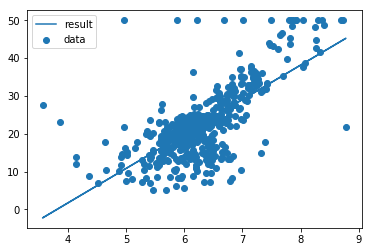

In [29]:
plt.scatter(rm,target,label="data")
plt.plot(rm,pred2,label="result")
plt.legend()
plt.show()

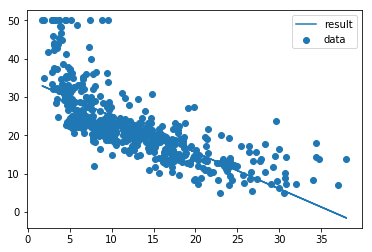

In [30]:
plt.scatter(lstat,target,label="data")
plt.plot(lstat,pred3,label="result")
plt.legend()
plt.show()

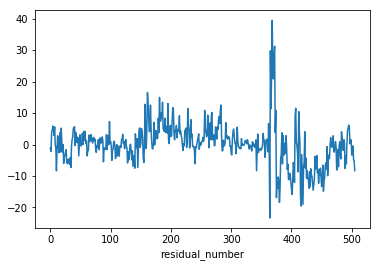

In [31]:
fitted_model2.resid.plot()
plt.xlabel("residual_number")
plt.show()

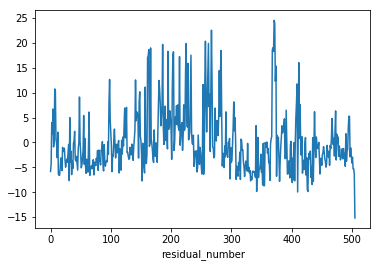

In [32]:
fitted_model3.resid.plot()
plt.xlabel("residual_number")
plt.show()

# 다중선형회귀분석

## crim, rm, lstat 세개의 변수를 통해 다중회귀적합

In [33]:
x_data=boston[['CRIM','RM','LSTAT']] ##변수 여러개
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [34]:
x_data1 = sm.add_constant(x_data, has_constant='add')


In [35]:
multi_model = sm.OLS(target,x_data1)
fitted_multi_model=multi_model.fit()

In [38]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Fri, 23 Aug 2019   Prob (F-statistic):          1.01e-112
Time:                        13:12:59   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 단순선형회귀모델의 회귀계수와 비교

In [39]:
print(fitted_model1.params)
print(fitted_model2.params)
print(fitted_model3.params) ##단순선형회귀분석의 회귀 계수(R2)와 비교

const    24.033106
CRIM     -0.415190
dtype: float64
const   -34.670621
RM        9.102109
dtype: float64
const    34.553841
LSTAT    -0.950049
dtype: float64


In [41]:
print(fitted_multi_model.params)  

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64


## 행렬연산을 통해 beta구하기

In [86]:
from numpy import linalg ##행렬연산을 통해 beta구하기 
ba=linalg.inv((np.dot(x_data1.T,x_data1))) ## (X'X)-1
np.dot(np.dot(ba,x_data1.T),target) ##(X'X)-1X'y

array([[-2.56225101],
       [-0.10294089],
       [ 5.21695492],
       [-0.57848582]])

In [43]:
pred4=fitted_multi_model.predict(x_data1)

## residual plot

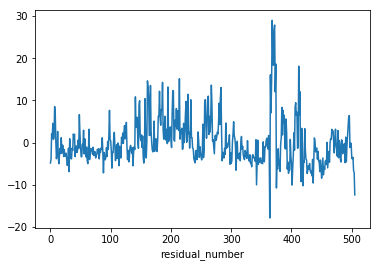

In [58]:
fitted_multi_model.resid.plot()
plt.xlabel("residual_number")
plt.show()

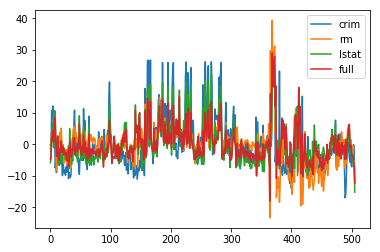

In [65]:
fitted_model1.resid.plot(label="crim")
fitted_model2.resid.plot(label="rm")
fitted_model3.resid.plot(label="lstat")
fitted_multi_model.resid.plot(label="full")
plt.legend()